# Customer Segmentation Using K-Means Clustering

## Introduction
In this notebook, we explore customer segmentation using the K-Means clustering algorithm. The goal is to identify distinct groups of customers based on their purchasing behavior, allowing businesses to tailor marketing strategies and enhance customer satisfaction.

## Problem Description
Customer segmentation involves dividing a customer base into distinct groups that exhibit similar characteristics. By clustering customers, we can target each group with personalized marketing, improve customer service, and optimize business operations.

## Load Libraries and Data
We begin by loading the necessary Python libraries and the customer dataset. The dataset contains information on customer demographics and purchasing behavior.

In [1]:
%pip install seaborn

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv('data/Mall_Customers.csv')

# Display the first few rows of the dataset
data.head()

<ipython-input-2-cf3ba5cba44d>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis (EDA)
### Summary Statistics
We analyze the basic statistics of the dataset to understand the range, mean, and distribution of the features.

### Check for Missing Values
We then check for any missing values in the dataset to ensure data completeness and accuracy.

### Data Types and Unique Values
Finally, we inspect the data types and unique values of each column to understand the nature of the data and identify categorical variables.

In [12]:
# Summary Statistics
summary_statistics = data.describe()

# Check for Missing Values
missing_values = data.isnull().sum()

# Data Types and Unique Values
data_info = data.info()

# Display the results
summary_statistics, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Cluster                 200 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 7.9+ KB


(       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)  \
 count  200.000000  200.000000          200.000000              200.000000   
 mean   100.500000   38.850000           60.560000               50.200000   
 std     57.879185   13.969007           26.264721               25.823522   
 min      1.000000   18.000000           15.000000                1.000000   
 25%     50.750000   28.750000           41.500000               34.750000   
 50%    100.500000   36.000000           61.500000               50.000000   
 75%    150.250000   49.000000           78.000000               73.000000   
 max    200.000000   70.000000          137.000000               99.000000   
 
           Cluster  
 count  200.000000  
 mean     1.400000  
 std      1.098194  
 min      0.000000  
 25%      0.000000  
 50%      1.000000  
 75%      2.000000  
 max      3.000000  ,
 CustomerID                0
 Genre                     0
 Age                       0
 Annual Income (k$)

### Visualize Distributions of Key Features
We visualize the distributions of key numerical features such as Age, Annual Income, and Spending Score to gain insights into the customer base.

### Scatterplot Matrix
We examine the scatterplot matrix to explore relationships between pairs of variables, along with histograms of the distributions of individual variables.


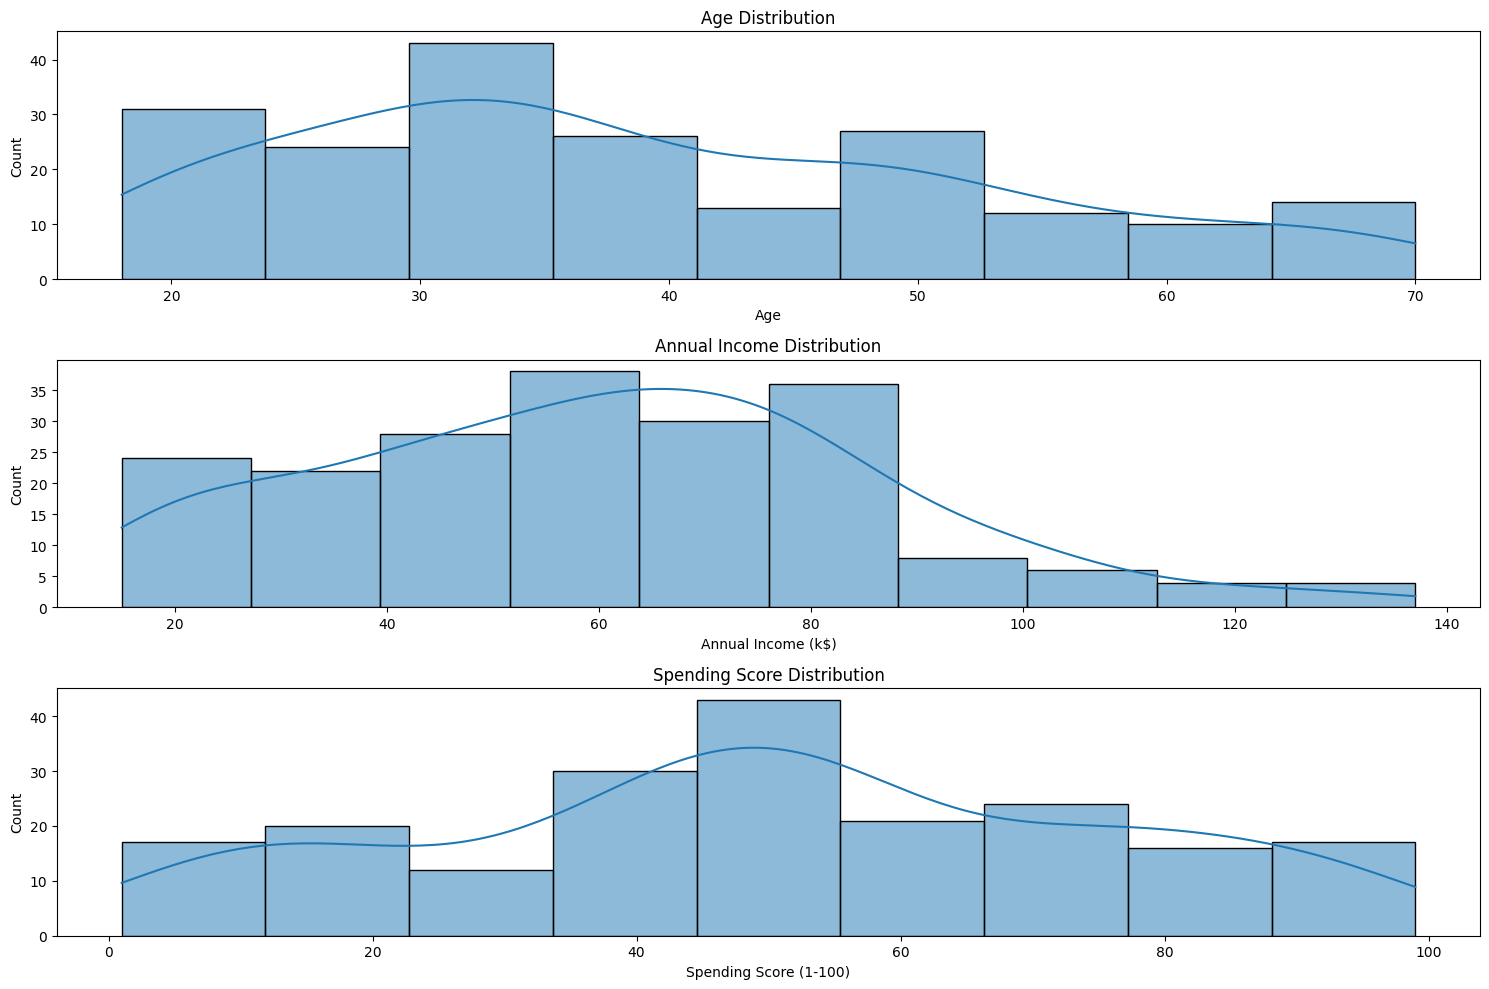

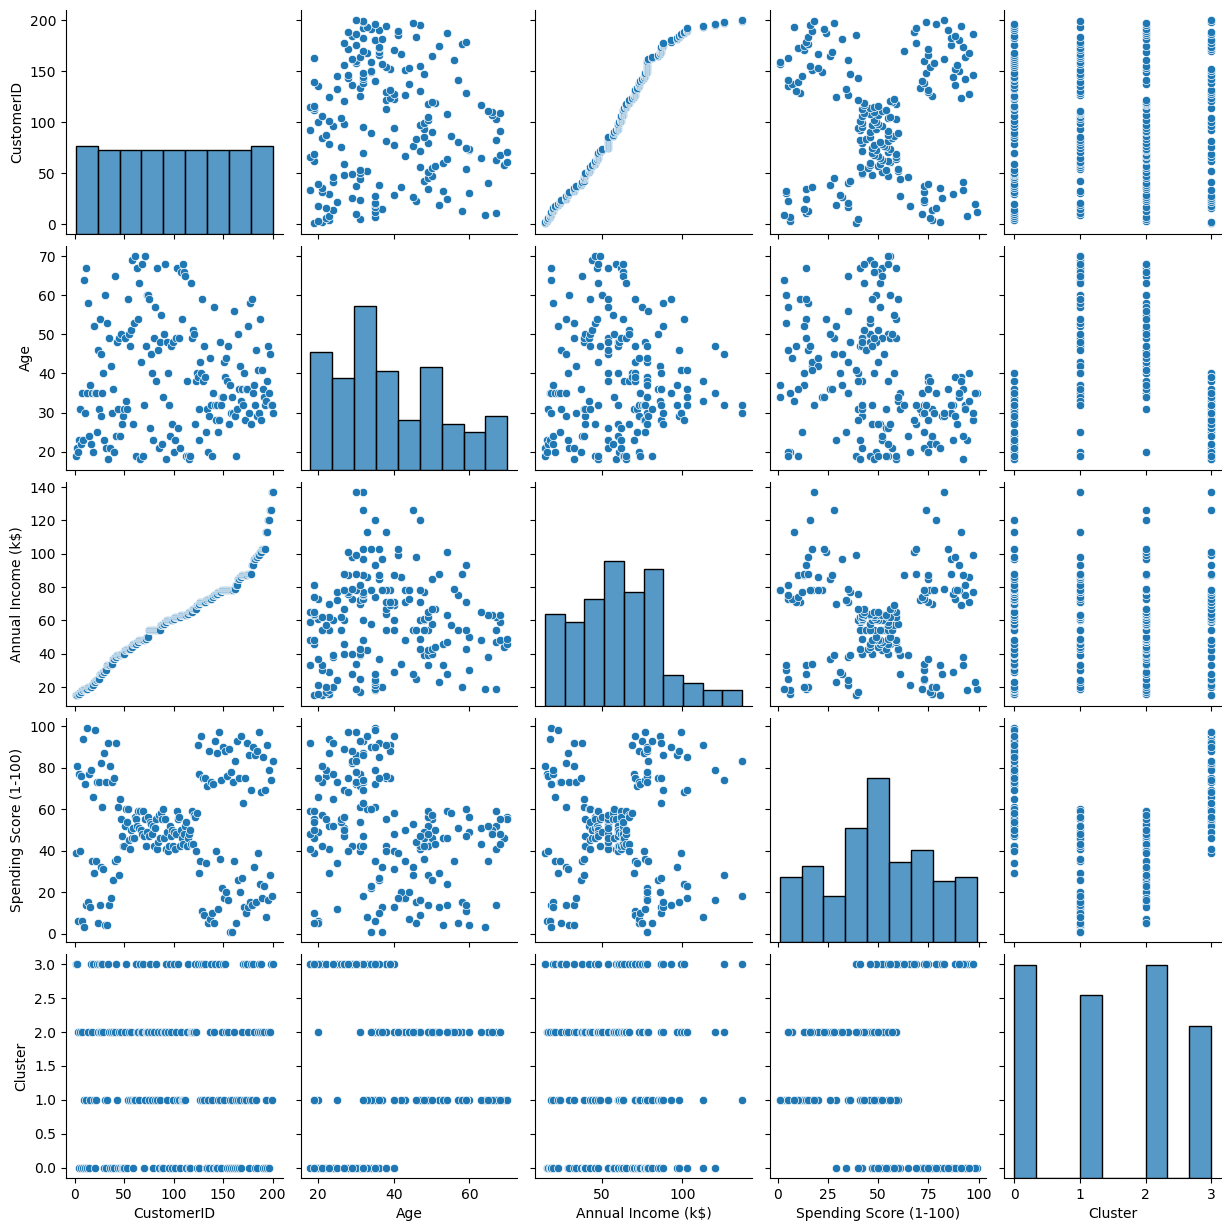

In [18]:
# Plotting distributions for numerical features
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(3, 1, 2)
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')

plt.subplot(3, 1, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

# Correlation Matrix
sns.pairplot(data)
plt.show()

## Data Preprocessing
### Encode the Categorical Variable (Genre)
We convert the categorical variable 'Genre' into numerical format using one-hot encoding, allowing it to be used in clustering algorithms.

### Scale the Numerical Features
We standardize the numerical features to ensure they have a mean of 0 and a standard deviation of 1, preventing any single feature from dominating the clustering process.


In [22]:
# One-hot encode the 'Genre' column
data_encoded = pd.get_dummies(data, columns=['Genre'], drop_first=True)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data_encoded.drop(columns=['CustomerID']))

# Convert the scaled data to a DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=data_encoded.columns.drop('CustomerID'))

## Model Building
### Determine the Optimal Number of Clusters
We use the Elbow Method to determine the optimal number of clusters. By plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters, we identify the point where the WCSS starts to decrease slowly.

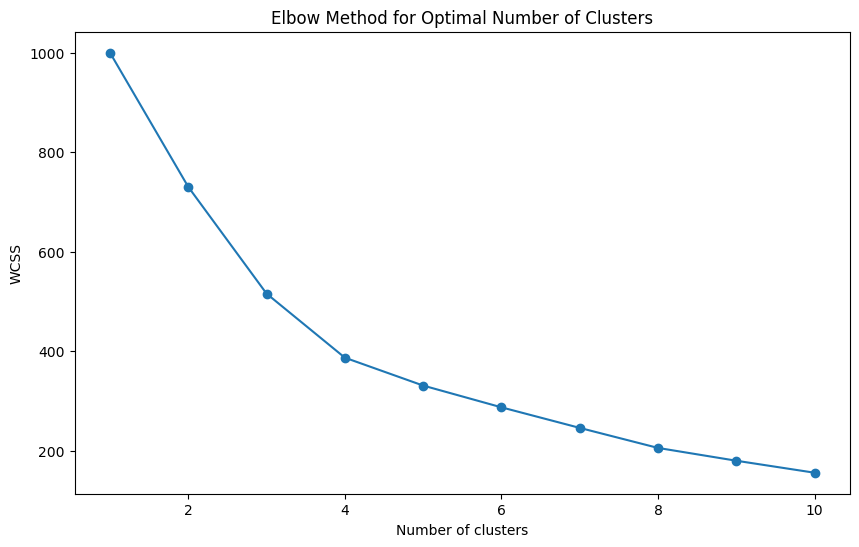

In [21]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Fit K-Means with the Optimal Number of Clusters
We fit the K-Means model using the optimal number of clusters determined in the previous step. Each customer is assigned to a cluster based on their similarity to the cluster centers.

## Model Analysis
### Visualize the Clusters
We visualize the clusters formed by K-Means, plotting features such as Annual Income and Spending Score to observe the distribution of customers across clusters.


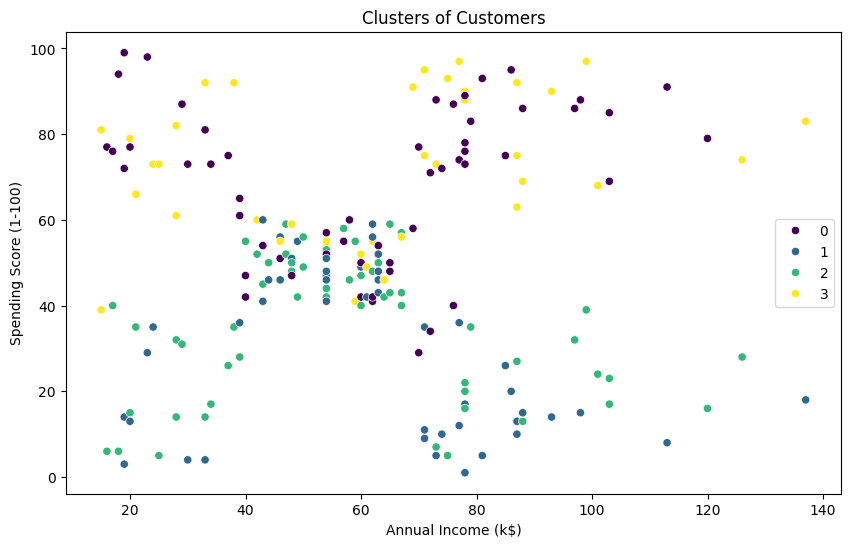

In [10]:
# Fit K-Means with the optimal number of clusters (assume optimal_clusters = 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_data_df)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Evaluate Clustering with Silhouette Score
We calculate the Silhouette Score to evaluate the quality of the clusters. The score indicates how well each customer fits within its cluster compared to other clusters, with higher scores suggesting better-defined clusters.

In [24]:
# Evaluate clustering with Silhouette Score
silhouette_avg = silhouette_score(scaled_data_df, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.43


## Results and Discussion
A Silhouette Score of 0.43 indicates moderate clustering quality. While there is some structure in the data, there may be room for improvement in distinguishing the clusters. By exploring alternative numbers of clusters, refining features, and understanding the data's natural groupings, you can work towards improving the clustering results and deriving more actionable insights from the analysis.

## Conclusion
In this notebook, we embarked on a customer segmentation project using the K-Means clustering algorithm. The dataset provided information on customers, including their demographics and spending behavior. Our primary objective was to identify distinct customer groups to enhance business strategies such as targeted marketing and personalized services.

Key Steps and Findings:
Exploratory Data Analysis (EDA):

We explored the dataset's characteristics, including summary statistics, feature distributions, and relationships between variables. The data was generally well-distributed, with no missing values, providing a solid foundation for clustering.
Data Preprocessing:

Categorical variables were encoded, and numerical features were scaled to ensure uniformity in the clustering process. This step was crucial for maintaining the integrity of distance-based methods like K-Means.
Clustering and Model Evaluation:

We applied the K-Means algorithm and determined the optimal number of clusters using the Elbow Method. The resulting Silhouette Score of 0.43 indicated a moderate level of cluster separation. While some clusters were well-defined, others showed overlapping characteristics, suggesting potential for further refinement.
Cluster Analysis:

The clusters revealed distinct groups of customers based on factors such as age, annual income, and spending score. These clusters offer valuable insights into customer segments, such as high-income high-spenders, young low-spenders, and others.
Implications and Future Work:
Despite the moderate Silhouette Score, the clustering analysis provided actionable insights into customer segments. These insights can inform marketing strategies, such as targeted campaigns for different customer groups or personalized product recommendations.

For future work, several avenues could be explored to enhance the quality of clustering:

Feature Engineering: Further refining and expanding the set of features, including incorporating additional data sources, could improve the distinctiveness of clusters.
Exploring Other Clustering Algorithms: Alternative algorithms like DBSCAN or hierarchical clustering may better capture the natural groupings in the data, especially if there are non-linear boundaries.
Refinement of Cluster Numbers: Revisiting the choice of the number of clusters and using additional evaluation metrics could lead to better-defined customer segments.
In conclusion, this analysis provided a foundational understanding of customer segmentation within the dataset. While there is room for improvement, the identified clusters offer valuable directions for personalized customer engagement and business optimization.
